# 1. Info about dataset

Stack Overflow’s annual Developer Survey is the largest and most comprehensive survey of people who code around the world. Each year, we field a survey covering everything from developers’ favorite technologies to their job preferences. This year marks the ninth year we’ve published our annual Developer Survey results, and nearly 90,000 developers took the 20-minute survey earlier this year.

The dataset you are going to use in this assignment comes from the following source: https://stackoverflow.blog/2019/04/09/the-2019-stack-overflow-developer-survey-results-are-in/ under a ODbL: Open Database License (https://opendatacommons.org/licenses/odbl/1-0/).




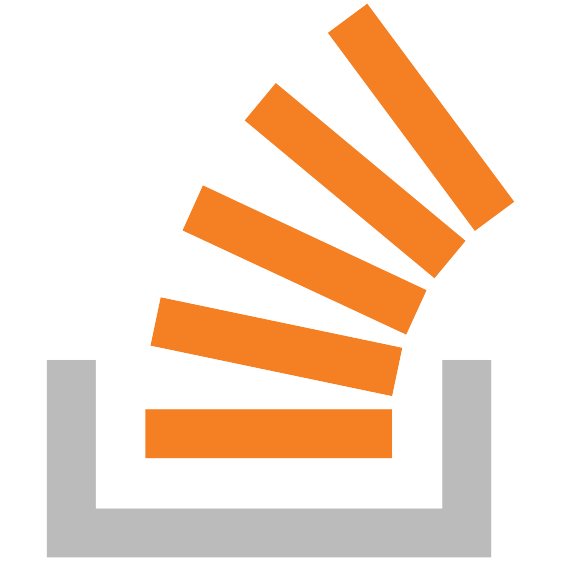

## Description:

The enclosed data set is the full, cleaned results of the 2019 Stack Overflow Developer Survey. Free response submissions and personally identifying information have been removed from the results to protect the privacy of respondents. There are three files:

1. survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
2. survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name
3. so_survey_2019.pdf - PDF file of survey instrument


## 1.1 Data collection

First, we need to import libraries, download & extract the .zip file provided by stack overflow:

In [1]:
# import all required libraries:

import pandas as pd
import numpy as np
import requests
import zipfile
import os
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline



In [2]:
# URL of the ZIP file
url = "https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2019.zip"

# Directory to save the extracted CSV files
output_directory = './extracted_dataset'

# Make sure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Download the ZIP file
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content)) as thezip:
    # Extract only CSV files
    for file in thezip.namelist():
        if file.endswith('.csv'):
            thezip.extract(file, path=output_directory)
            print(f'Extracted {file} to {output_directory}/')

# All CSV files are saved in the specified directory with their original names


Extracted survey_results_public.csv to ./extracted_dataset/
Extracted survey_results_schema.csv to ./extracted_dataset/


In [3]:
# Read the dataset `survey_results_public.csv` as df and print first 5 rows:

df = pd.read_csv('C:/Users/jakub/Desktop/Projekty/IBM Data Analyst Capstone Project/Week06-Presentation/extracted_dataset/survey_results_public.csv')
df.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
#Names of columns, number of rows for each column and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [5]:
#this function provide basic info about numeric columns
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [6]:
#Read schema.csv file
df_info = pd.read_csv('C:/Users/jakub/Desktop/Projekty/IBM Data Analyst Capstone Project/Week06-Presentation/extracted_dataset/survey_results_schema.csv')

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)  # Set it None to display all rows
pd.set_option('display.max_columns', None) # Set it None to display all columns
pd.set_option('display.max_colwidth', None) # Increase max_colwidth to show more content, or set to None to show all content

#Read info about the columns meanings
df_info

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?
5,Employment,Which of the following best describes your current employment status?
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
8,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed?
9,UndergradMajor,What was your main or most important field of study?


In [7]:
#Reset pandas settings
pd.reset_option('all')

# 2. Data cleaning

-   Identify duplicate values in the dataset.

-   Remove duplicate values from the dataset.

-   Identify missing values in the dataset.

### 2.1 Finding duplicates

In [8]:
# Dropping duplicate rows based on all columns
df_unique = df.drop_duplicates()
print("Number of deleted rows is:",df.shape[0] - df_unique.shape[0])

Number of deleted rows is: 0


### 2.2 Finding Missing values

In [9]:
print(df.isnull().sum())
print("Total missing values is:", df.isnull().sum().sum())

Respondent          0
MainBranch        552
Hobbyist            0
OpenSourcer         0
OpenSource       2041
                ...  
Sexuality       12736
Ethnicity       12215
Dependents       5824
SurveyLength     1899
SurveyEase       1802
Length: 85, dtype: int64
Total missing values is: 1028850


**Dataset is clear and without any duplicates or wrong data types. No further data cleaning is neccessary.**

-   Identify duplicate values in the dataset --> **No duplicates**

-   Identify missing values in the dataset --> **Columns contains missing values. It is necessary to take them into consideration during further analysis and graphic displays.**

# 3. Data analysis

## 3.1 Types of respondents

In [10]:
df["DevType"].value_counts().head(10)

DevType
Developer, full-stack                                                                                           8433
Developer, back-end                                                                                             4913
Developer, back-end;Developer, front-end;Developer, full-stack                                                  2399
Developer, front-end                                                                                            2212
Developer, mobile                                                                                               2172
Developer, back-end;Developer, full-stack                                                                       2047
Student                                                                                                         1515
Developer, front-end;Developer, full-stack                                                                      1023
Developer, desktop or enterprise applications           

In [11]:
# Split and explode the Series on semicolon
exploded_series = df["DevType"].str.split(';').explode()

# Extract right names by splitting on the comma and selecting the second part (after comma and space)
dev_type = exploded_series.str.split(', ').str[1].dropna()

# Count occurrences of each descriptor
dev_type_counts = dev_type.value_counts()

# Select top 5 categories
dev_type_top5 = dev_type_counts.head(5)

# Check if there are more than 5 categories and add 'Other' category if true
if len(dev_type_counts) > 5:
    other_sum = dev_type_counts[5:].sum()
    dev_type_top5['Other'] = other_sum

dev_type_top5

DevType
full-stack                            42222
back-end                              40665
front-end                             26649
desktop or enterprise applications    17316
mobile                                14698
Other                                 26816
Name: count, dtype: int64

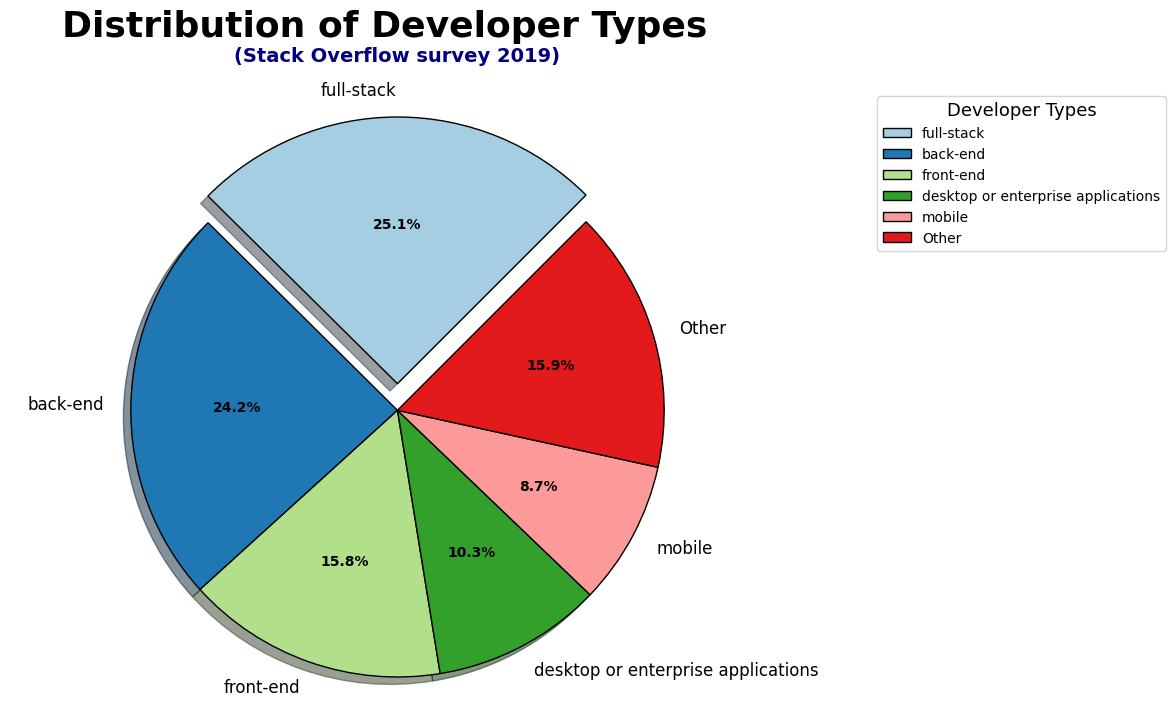

In [12]:
# Colors for each segment
colors = plt.cm.Paired(range(len(dev_type_counts)))

# Explode the 1st slice
explode = (0.1, 0, 0, 0, 0, 0)  # only "explode" the 1st slice

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(dev_type_top5, labels=dev_type_top5.index, autopct='%1.1f%%', startangle=45,
                                   colors=colors, explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'},
                                   textprops={'fontsize': 12, 'color': 'black'})

plt.title('(Stack Overflow survey 2019)', fontsize=14, fontweight='bold', color='navy', pad=20)
plt.suptitle('Distribution of Developer Types', fontsize=26, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(wedges, dev_type_top5.index, title='Developer Types', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=10, title_fontsize='13')

# Adjusting font size and color of the autopct texts for better readability
for autotext in autotexts:
    autotext.set_color('black')  # Change text color to white for contrast
    autotext.set_weight('bold')  # Make text bold
    autotext.set_size(10)        # Increase text size for better visibility
    
    
    

# Display the pie chart
plt.show()

## 3.1 Info about salary converted to USD dollars (annualy) 

In [89]:
# Print average sallary for all devs
clean_salary = df["ConvertedComp"].dropna()
mean_salary = clean_salary.mean().round()
print("Mean anually salary for developers is:",avg_salary,"USD")
median_salary = clean_salary.median()
print("Median anually salary for developers is:",median_salary,"USD")

Mean anually salary for developers is: 127111.0 USD
Median anually salary for developers is: 57287.0 USD


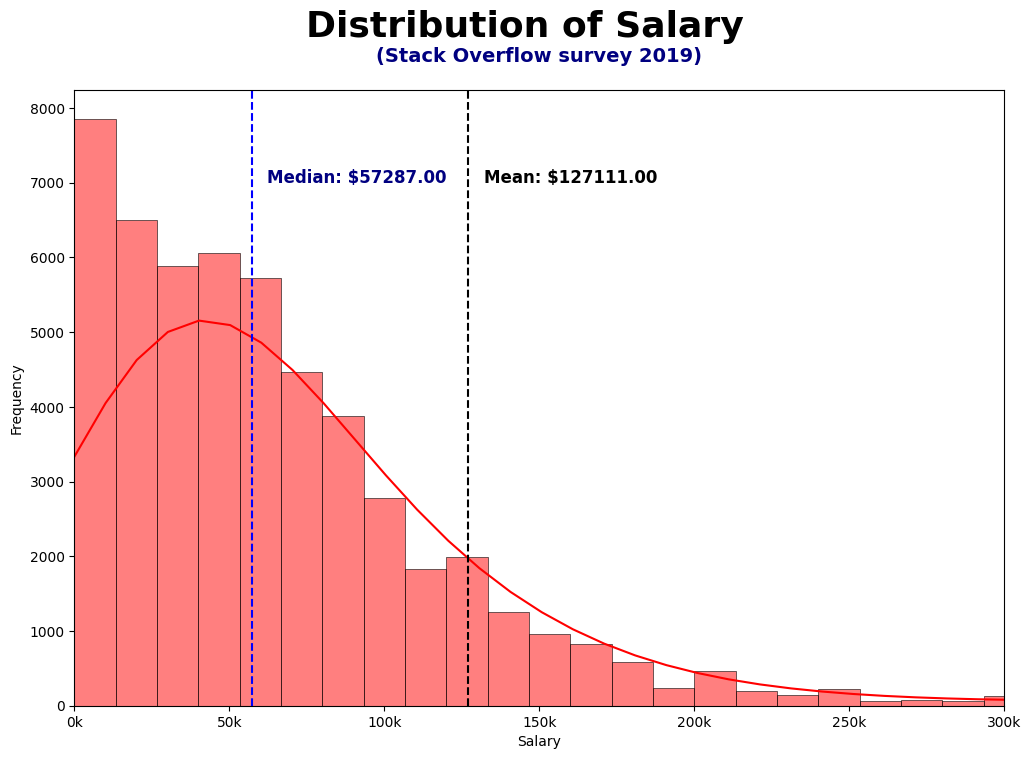

In [91]:
num_bins = 150
plt.figure(figsize=(12, 8))

# Plot the distribution curve using seaborn
sns.histplot(clean_salary, bins=num_bins, kde=True, color='red', label='Distribution Curve')

# Add title and labels

plt.title('(Stack Overflow survey 2019)', fontsize=14, fontweight='bold', color='navy', pad=20)
plt.suptitle('Distribution of Salary', fontsize=26, fontweight='bold')
plt.xlabel('Salary')
plt.ylabel('Frequency')


plt.axvline(x=median_salary, color='blue', linestyle='--', label=f'Mean: {median_salary:.2f}')
plt.text(median_salary + 5000, 7000, f'Median: ${median_salary:.2f}', rotation=0,fontsize=12, fontweight='bold',color='navy')

plt.axvline(x=mean_salary, color='black', linestyle='--', label=f'Mean: {mean_salary:.2f}')
plt.text(mean_salary + 5000, 7000, f'Mean: ${mean_salary:.2f}', rotation=0,fontsize=12, fontweight='bold')

# Get current axes
def thousands_formatter(x, pos):
    return '{:.0f}k'.format(x / 1000)

# Upravit x-ovú os
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.xlim(0, 300000)


plt.show()

Text(0.5, 0.98, 'Boxplot of Salary')

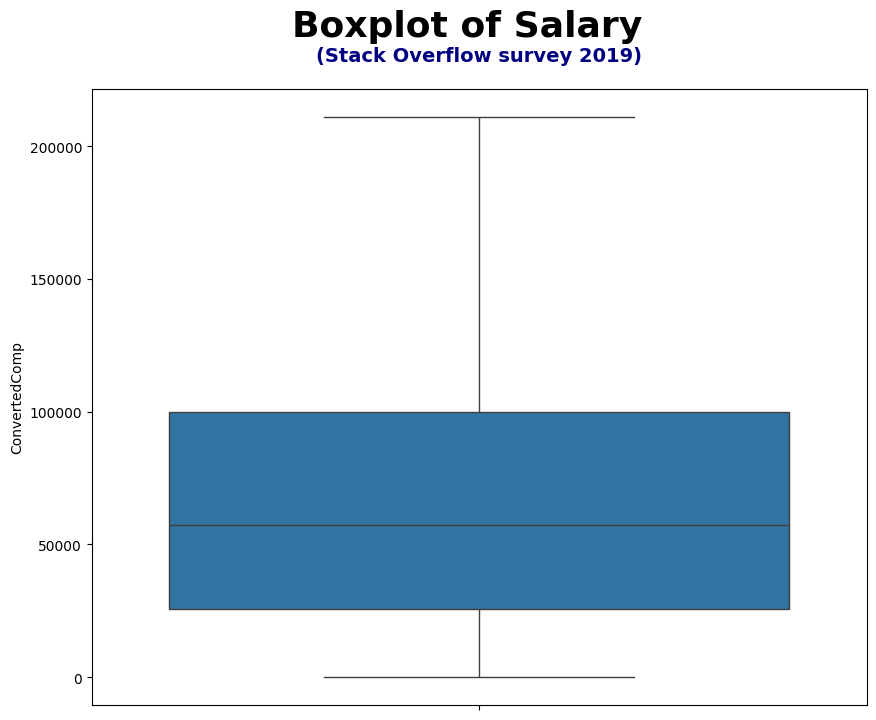

In [92]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=clean_salary, showfliers=False)

plt.title('(Stack Overflow survey 2019)', fontsize=14, fontweight='bold', color='navy', pad=20)
plt.suptitle('Boxplot of Salary', fontsize=26, fontweight='bold')


In [93]:
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.00,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.00,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.00,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.00,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.00,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,88377,NaN,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,"Not employed, and not looking for work",Canada,No,Primary/elementary school,NaN,...,NaN,Tech articles written by other developers;Tech...,NaN,Man,No,NaN,NaN,No,Appropriate in length,Easy
88879,88601,NaN,No,Never,The quality of OSS and closed source software ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,88802,NaN,No,Never,NaN,Employed full-time,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88881,88816,NaN,No,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


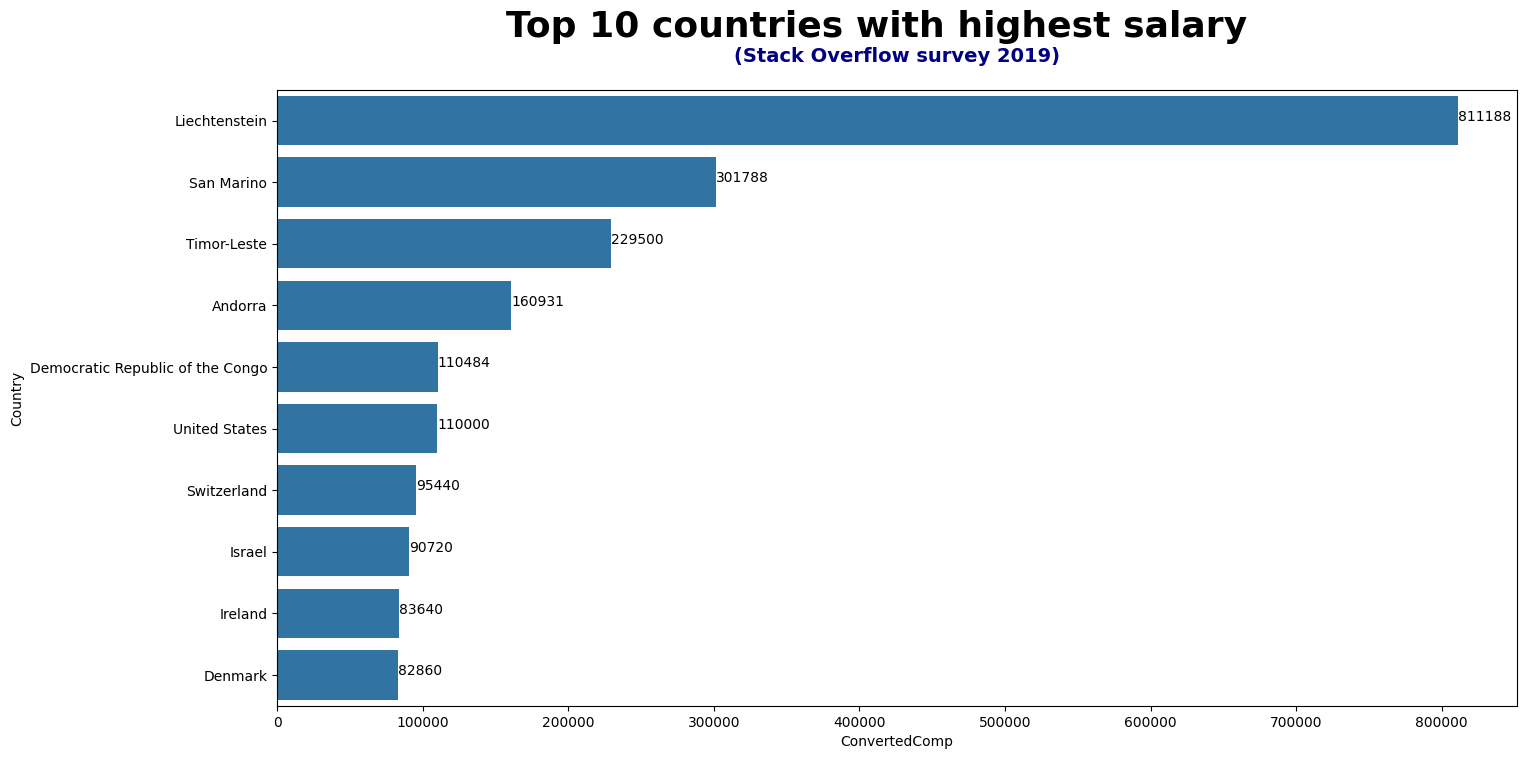

In [121]:
country_salary = df[["ConvertedComp", "Country"]].dropna()
country_salary = country_salary.groupby("Country")["ConvertedComp"].median().reset_index()
country_salary = country_salary.sort_values(by='ConvertedComp', ascending=False)
country_salary = country_salary.head(10)

plt.figure(figsize=(16, 8))
barplot = sns.barplot(data=country_salary, x="ConvertedComp", y="Country", orient="horizontal")

plt.title('(Stack Overflow survey 2019)', fontsize=14, fontweight='bold', color='navy', pad=20)
plt.suptitle('Top 10 countries with highest salary', fontsize=26, fontweight='bold')

# Annotate bars with values
for index, value in enumerate(country_salary["ConvertedComp"]):
    barplot.text(value, index, f'{value:.0f}', color='black', ha="left", fontsize=10)


In [127]:

# Split and explode the Series on semicolon
exploded_series = df["LanguageWorkedWith"].str.split(';').explode()

# Extract right names by splitting on the comma and selecting the second part (after comma and space)
dev_type = exploded_series.str.split(', ').str[1].dropna()

# Count occurrences of each descriptor
dev_type_counts = dev_type.value_counts()

# Select top 5 categories
dev_type_top5 = dev_type_counts.head(10)

# Check if there are more than 5 categories and add 'Other' category if true
if len(dev_type_counts) > 10:
    other_sum = dev_type_counts[10:].sum()
    dev_type_top5['Other'] = other_sum

dev_type_top5


Series([], Name: count, dtype: int64)

In [180]:
# Split and explode the Series on semicolon
exploded_series = df["LanguageWorkedWith"].str.split(';').explode()
current_lang_counts = exploded_series.value_counts()
current_lang_top10 = current_lang_counts.head(10)

if len(current_lang_counts) > 10:
    other_sum = current_lang_counts[10:].sum()
    current_lang_top10['Other'] = other_sum

exploded_series = df["LanguageDesireNextYear"].str.split(';').explode()
future_lang_counts = exploded_series.value_counts()
future_lang_top10 = future_lang_counts.head(10)

if len(future_lang_counts) > 10:
    other_sum = future_lang_counts[10:].sum()
    future_lang_top10['Other'] = other_sum

In [159]:
current_lang_top10.info()

<class 'pandas.core.series.Series'>
Index: 6 entries, JavaScript to Other
Series name: count
Non-Null Count  Dtype
--------------  -----
6 non-null      int64
dtypes: int64(1)
memory usage: 268.0+ bytes


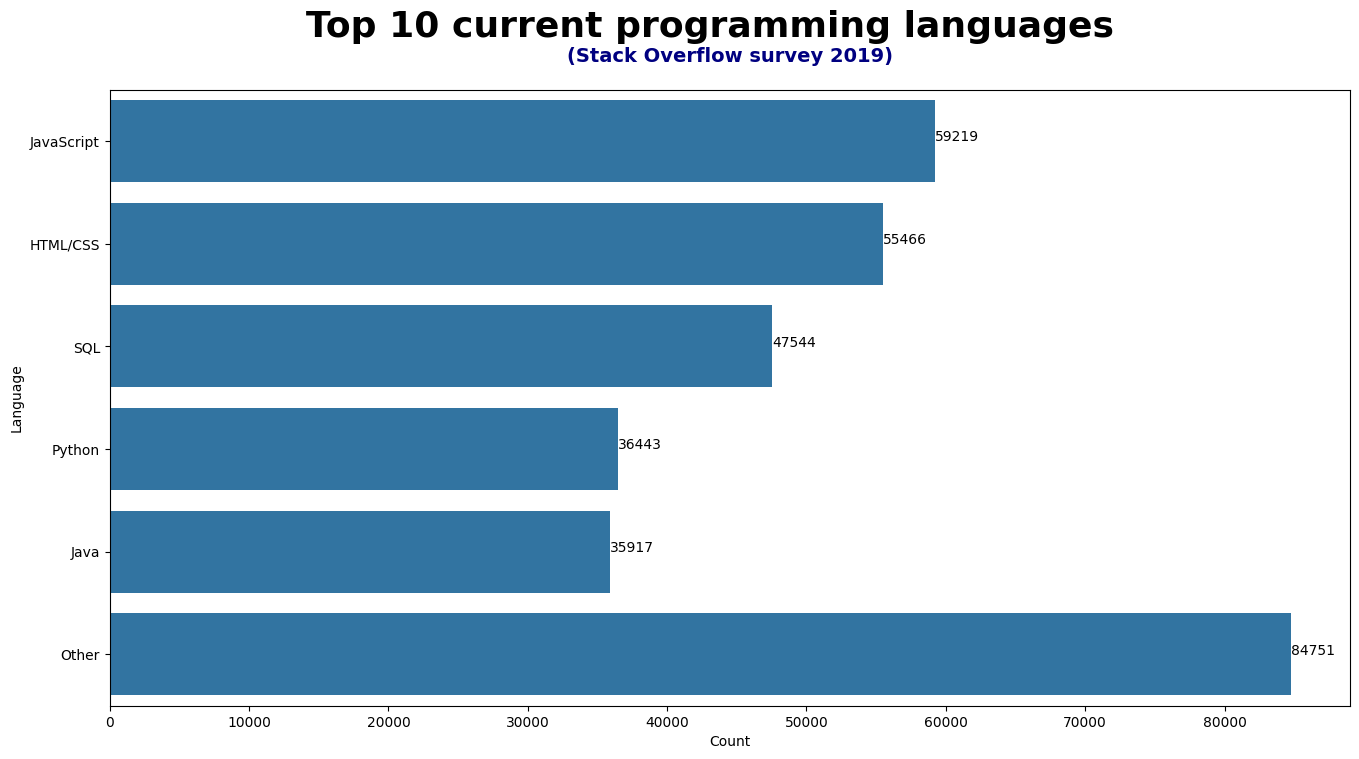

In [178]:
current_lang_top10 = current_lang_top10.reset_index()  # Convert Series to DataFrame
current_lang_top10.columns = ['Language', 'Count']  # Rename columns if needed

# Now plot the barplot
plt.figure(figsize=(16, 8))
barplot = sns.barplot(data=current_lang_top10, y='Language', x='Count', orient='horizontal')

plt.title('(Stack Overflow survey 2019)', fontsize=14, fontweight='bold', color='navy', pad=20)
plt.suptitle('Top 10 current programming languages', fontsize=26, fontweight='bold')
plt.xlabel('Count')

# Annotate bars with values
for index, value in enumerate(current_lang_top10["Count"]):
    barplot.text(value, index, f'{value:.0f}', color='black', ha="left", fontsize=10)

plt.show()

In [183]:
future_lang_top10 = future_lang_top10.reset_index()  # Convert Series to DataFrame
future_lang_top10.columns = ['Language', 'Count']  # Rename columns if needed

# Now plot the barplot
plt.figure(figsize=(16, 8))
barplot = sns.barplot(data=future_lang_top10, y='Language', x='Count', orient='horizontal')

plt.title('(Stack Overflow survey 2019)', fontsize=14, fontweight='bold', color='navy', pad=20)
plt.suptitle('Top 10 current programming languages', fontsize=26, fontweight='bold')
plt.xlabel('Count')

# Annotate bars with values
for index, value in enumerate(future_lang_top10["Count"]):
    barplot.text(value, index, f'{value:.0f}', color='black', ha="left", fontsize=10)

plt.show()

ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements